# Peak Shaving Plots 28-11-2020 MPC RBC

Notebook to produce plots comparing RBC with MPC peak shaving mode on the 28/11/20

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import dates
import matplotlib
import numpy as np
import seaborn as sns

In [103]:
sim_date = '2020-11-28'

In [104]:
#eco = pd.read_csv('CSV/RBC_20min_DRH_2020-11-28.csv', index_col=0)
rbc = pd.read_csv('CSV/RBC_Results.csv', index_col=0)
rbc.index = pd.to_datetime(rbc.index, format='%Y-%m-%d %H:%M:%S')
eco = rbc.loc[sim_date]

In [105]:
#vreg = pd.read_csv('Voltage_Regulation_20min_26-22-2020_7am_7pm.csv', index_col=0)
#vreg = pd.read_csv('CSV/Peak_shave_20min_26-22-2020_3pm_7pm.csv', index_col=0)
vreg = pd.read_csv('CSV/PSmode_20min_DRH_2020-11-28_3pm_5pm.csv', index_col=0)
vreg.index = pd.to_datetime(vreg.index, format='%Y-%m-%d %H:%M:%S')

In [106]:
dt = 1/3

In [107]:
def plot_electrical3(df_results, sim):
    
    sns.set(font_scale=1.35, rc={'figure.figsize':(12,5)})
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    matplotlib.rcParams['font.family'] = 'Abyssinica SIL'
    
    
    fig = plt.figure(figsize=(12,8))
    
    gs=GridSpec(3,1) # 2 rows, 3 columns

    ax1=fig.add_subplot(gs[0,0]) # First row, first column
    ax2=fig.add_subplot(gs[1:,0]) # First row, second column
    
    ax2.xaxis.set_major_formatter(dates.DateFormatter('%H:%S'))

    
    load =  ax2.plot(df_results.index, df_results['load'], label='$p_i^l$', lw=1, color='red', ls=(0, (3, 1, 1, 1)))
    pv =  ax2.plot(df_results.index, df_results['pv'], label='$p_i^p$', lw=1, color='blue', ls=(0, (5, 5)))
    im =  ax2.plot(df_results.index, df_results['p_im'], label='$p_i^i$', lw=1, color='grey', ls='-.')
    ex =  ax2.plot(df_results.index, df_results['p_ex'], label='$p_i^e$', lw=1, color='orange', ls=(0, (3, 1, 1, 1, 1, 1)))
    ch =  ax2.plot(df_results.index, df_results['p_ch'], label='$p_i^c$', lw=1.5,color='black', ls='dotted')
    dis =  ax2.plot(df_results.index, df_results['p_dis'], label='$p_i^d$', lw=1, color='green')
    hvac = ax2.plot(df_results.index, df_results['p_hvac'], label='$p_i^h$', lw=1, color='purple', ls=(0, (5, 1)))
    ax2.set_ylim(-7000,12000)
     
    soc = ax1.plot(df_results.index, df_results['soc'], label='$SoC$', lw=1, color='blue', ls='--')
    ax1.set_ylim(-10,120)
    
    ax3 = ax1.twinx()
    ax3.set_ylabel('Cost ($/kWh)')
    ax3.set_ylim(0,0.4)
    tou = ax3.plot(df_results.index, df_results['tou'], label='$ToU$', lw=1, color='red',)
    ax3.grid()
    
    ax2.set_xlabel('Time')
    ax1.set_ylabel('SoC (%)')
    ax1.get_shared_x_axes().join(ax1, ax2)
    ax1.set_xticklabels([])
    ax2.set_ylabel('Power (W)')
    
    ax2.legend(loc="upper left", ncol=7)
    ax1.legend(loc="upper left")
    ax3.legend(loc="upper right")
    
    
    fig.tight_layout()
    ax1.autoscale(enable=True, axis='x', tight=True)
    plt.savefig(f'Figures/{sim_date}_peak_shave_{sim}_electrical.pdf')
    
   
    plt.show()

In [108]:
def plot_netload(peak_shave, eco):
    
    sns.set(font_scale=1.35, rc={'figure.figsize':(12,5)})
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    matplotlib.rcParams['font.family'] = 'Abyssinica SIL'
    
    
    fig, ax1 = plt.subplots(figsize=(12,5))
    
    ax1.xaxis.set_major_formatter(dates.DateFormatter('%H:%S'))

    
    load =  ax1.plot(peak_shave.index, (eco['p_im']+eco['p_ex']), label='RBC $p_i$', lw=1.5, color='blue')
    pv =  ax1.plot(peak_shave.index, (peak_shave['p_im']+peak_shave['p_ex']), label='MPC $p_i$', lw=1.5, color='red', ls='--')
    ax1.set_ylim(-6000, 8000)
    ax1.axvspan(peak_shave.index[44], peak_shave.index[50], alpha=0.25, color='green', label='Peak Period')
   
    ax1.set_ylabel('Net Load (W)')
    ax1.set_xlabel('Time')
   
    ax1.legend(loc="upper left", ncol=4)
   
    
    fig.tight_layout()
    ax1.autoscale(enable=True, axis='x', tight=True)
    plt.savefig(f'Figures/{sim_date}_net_load_comparison.pdf')
    
    
    
    plt.show()

In [109]:
def plot_thermal_combined2(mpc_data, rbc_data):
    
    sns.set(font_scale=1.35, rc={'figure.figsize':(12,5)})
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    matplotlib.rcParams['font.family'] = 'Abyssinica SIL'
    
    fig, ax = plt.subplots(2, sharex=True)
    
    for x in ax:
        x.xaxis.set_major_formatter(dates.DateFormatter('%H:%S'))
    
    ax[0].set_ylabel('Temperature ($^\circ$C)')
    ax[0].set_ylim(15,45)
    ax[0].set_xlim(mpc_data.index[0],mpc_data.index[-1])
    ax[0].plot(mpc_data.index, mpc_data['T_i'], color='red', lw=2, ls='--')
    ax[0].plot(mpc_data.index, rbc_data['T_i'], color='black', lw=2, ls=(0, (3, 1, 1, 1, 1, 1)))
    ax[0].plot(mpc_data.index, mpc_data['t_ext'], color='green', ls='-.')
    #ax[0].plot(mpc_data.index, mpc_data['t_bed'])
    ax[0].plot(mpc_data.index, mpc_data['set_point'], color='grey')
    ax[0].legend(['MPC $T_i^i$', 'RBC $T_i^i$', '$T_a$', 'Set Point'], loc="upper left", ncol=2)
    
    
    
    #Plot Results
    
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Cooling (kW) \n Solar Irradiance (kW/m$^2$)')
    ax[1].set_ylim(0,10)
    #ax1.plot(df_results.index, df_results['phi_h_heat'], color='red')
    ax[1].plot(mpc_data.index, -mpc_data['phi_h_cool'], color='red', alpha=0.75, )
    ax[1].plot(mpc_data.index, -rbc_data['phi_h_cool'], color= 'black', ls=(0, (3, 1, 1, 1, 1, 1)))
    ax[1].plot(mpc_data.index, mpc_data['ghi']/1000, color='blue', ls='--')
    ax[1].legend(['MPC $\Phi_i^c$', 'RBC $\Phi_i^c$', 'GHI'], loc="upper left", ncol=3)



    
    fig.set_figheight(7.5)
    fig.set_figwidth(12)# otherwise the right y-label is slightly clipped
    #ax.grid()
    
    fig.tight_layout()
    ax[0].autoscale(enable=True, axis='x', tight=True)
    ax[1].autoscale(enable=True, axis='x', tight=True)
    plt.savefig(f'Figures/{sim_date}_peak_shave_thermal_comfort.pdf')
    
    plt.show()

In [110]:
def mpc_energy_df(mpc_results):
    mpc_energy = mpc_results['2020-11-23':'2020-11-29'][['p_load', 'pv', 'p_hvac', 'p_im', 'p_ex', 'p_ch', 'p_dis', 
                      'cost', 'payment']].resample('d').sum()
    
    mpc_energy[['p_load', 'pv', 'p_im', 'p_ex', 'p_ch', 'p_dis','p_hvac']] = (mpc_energy[['p_load', 'pv', 'p_im', 'p_ex', 'p_ch', 'p_dis','p_hvac']])/(1000)*dt
    
    mpc_energy.loc['Total'] = mpc_energy.sum()
    
    #print(mpc_energy)
    
    return mpc_energy

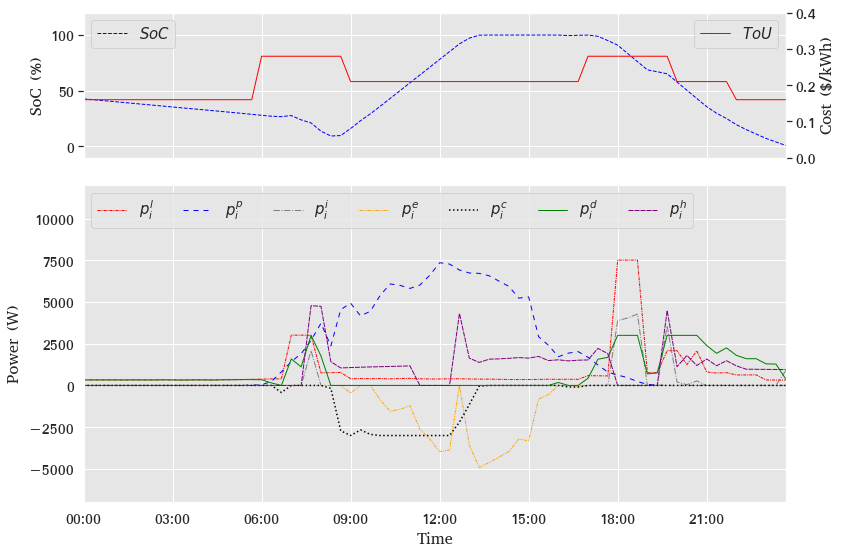

In [111]:
eco.loc[sim_date]['soc'] = (eco.loc[sim_date]['soc']/13.8)*100
plot_electrical3(eco[sim_date], 'rbc')

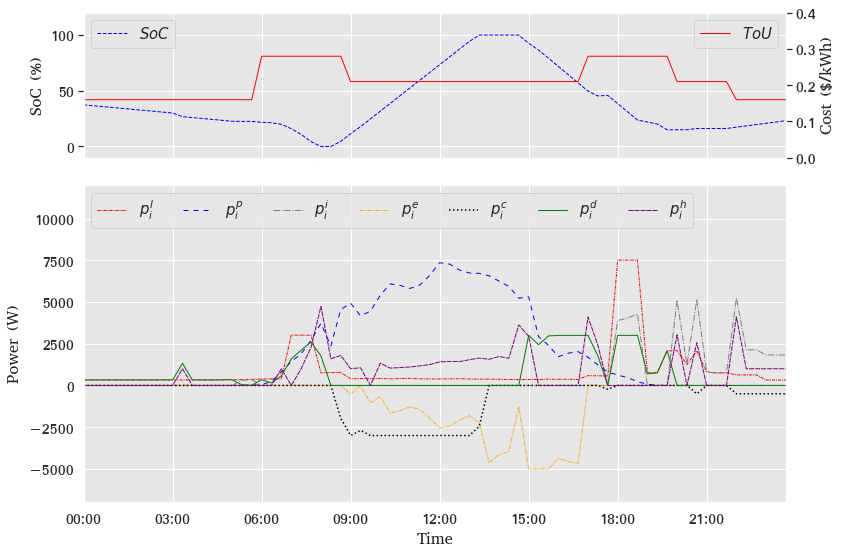

In [112]:
plot_electrical3(vreg[sim_date], 'mpc')

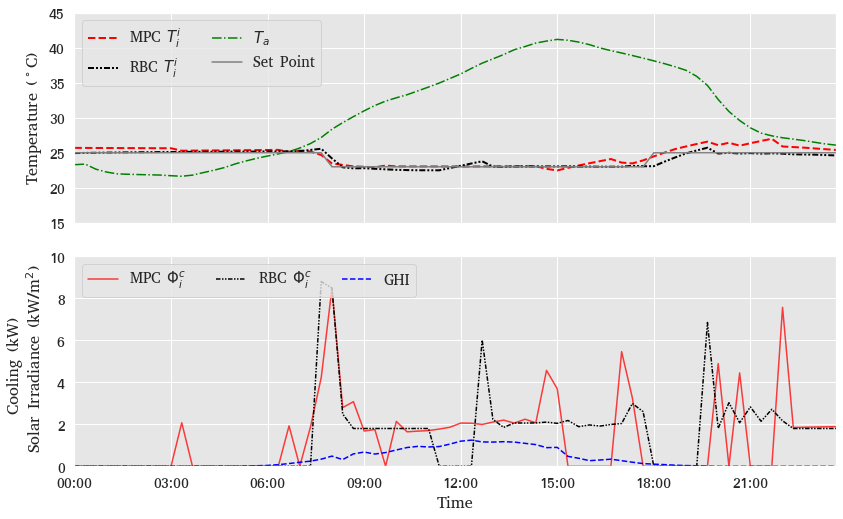

In [113]:
plot_thermal_combined2(vreg[sim_date], eco[sim_date])

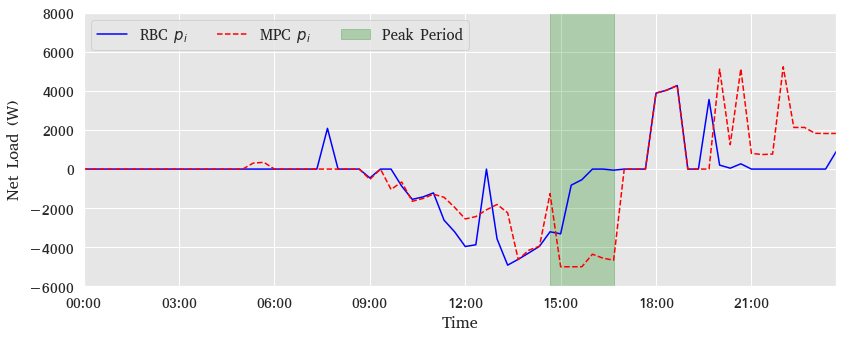

In [114]:
plot_netload(vreg.loc[sim_date], eco.loc[sim_date])

In [115]:
# eco_energy = mpc_energy_df(eco.loc['2020-11-28'])
# eco_energy

In [116]:
# vreg_energy = mpc_energy_df(vreg.loc['2020-11-28'])
# vreg_energy

In [117]:
# eco_energy.round(2).to_latex()

In [118]:
# vreg_energy.round(2).to_latex()

In [119]:
# vreg['2020-11-28']['T_i'].idxmax()

In [120]:
# ((vreg.loc['2020-11-28 15:00':'2020-11-28 18:40']['p_ex']/1000)*1/3).sum()

In [121]:
vreg.loc['2020-11-29 15:00':'2020-11-29 18:40']['p_ex'].mean()

nan

In [122]:
# eco.loc['2020-11-28 15:00':'2020-11-28 18:40']['p_ex'].mean()

In [126]:
rbc_ps = rbc.loc['2020-11-28 15:00':'2020-11-28 16:40']

In [129]:
(rbc_ps['p_im']+rbc_ps['p_ex']).mean()

-789.6708448668372

In [130]:
mpc_ps = vreg.loc['2020-11-28 15:00':'2020-11-28 16:40']

In [131]:
(mpc_ps['p_im']+mpc_ps['p_ex']).mean()

-4763.595895380059